# RKDE (Robust Kernel Density Estimation)

## Generating  the data set

In [50]:
import numpy as np 
import matplotlib.pyplot as plt

# Define the number of points
n_samples = 250

mu1, sigma1 = 0,1 # mean and variance
mu2, sigma2 = 10,1

x1 = np.random.normal(mu1,np.sqrt(sigma1),n_samples)
x2 = np.random.normal(mu2,np.sqrt(sigma2),n_samples)

def pdf(loc,variance,observation):
    '''Giving the Probability Density Function

    Parameters
    ----------
        loc (Int): Mean of the distribution ; where the peak of the bell exists
        variance(Int) : variance
        sample (Array) : the distribution

    Returns
    -------
        ndrray: Gaussian distribution
    '''
    # A normal continuous random variable.
    s1 = 1/(np.sqrt(2*np.pi*variance))
    s2 = np.exp(-(np.square(observation - loc)/(2*variance)))
    return s1 * s2 

# Adding outliers
outliers = np.random.randint(-5,15,40)
""" x1 = np.append(x1,outliers[:21])
x2 = np.append(x2,outliers[21:])
 """
X = np.array(list(x1) + list(x2))
X = np.append(X, outliers)
np.random.shuffle(X)
print("Dataset Shape: ", X.shape)
n_samples_final = X.shape[0]

Dataset Shape:  (540,)


### Visualize the training data

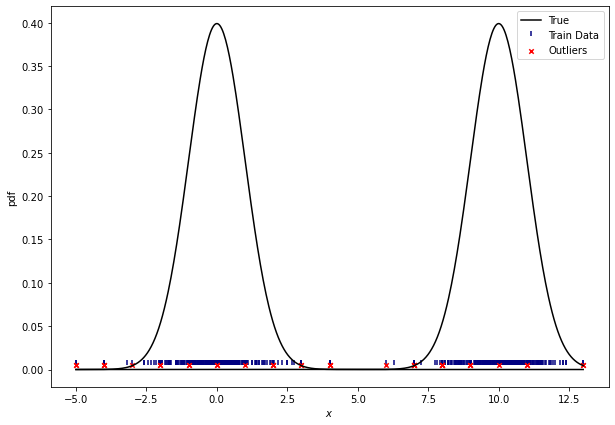

In [51]:
bins = np.linspace(np.min(X),np.max(X),n_samples_final)

plt.figure(figsize=(10,7))
plt.xlabel("$x$")
plt.ylabel("pdf")

plt.scatter(X,[.005] * len(X), color='navy', s=30, marker=2, label="Train Data")
plt.scatter(outliers,[.005] * len(outliers), color='red', s=20, marker='x', label="Outliers")


plt.plot(bins, pdf(mu1,sigma1,bins), color='black', label="True")
plt.plot(bins, pdf(mu2,sigma2,bins), color='black')

plt.legend()
plt.show()

## Applying KDE (Kernel Density Estimation)

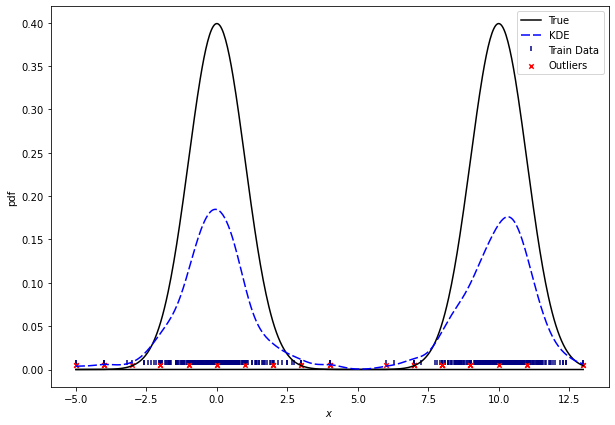

In [52]:
def kernel_function(obs,givenData,h,d=1):
    """ Kernel Function

    Parameters
    ----------
        obs (Int): Observation data
        h (Int): variance of the distribution
        d (Int, optional): dimension
        givenData (Int): Gaussian value
    
    Returns
    -------
        Int: kernel value   
    """
    result = (h**2 * 2*np.pi)**(-d/2) *np.exp((-1/2)* ((obs - givenData)/h)**2)
    return result

def kernel_density_function(obs_data,givenData,h=.1,d=1):
    '''Kernel Density Function
    Parameters
    ----------
        obs_data (Array): Observation data  
        h (Int): windows size
        d (Int, optional): dimension
        givenData (Array): Gaussian values

    Returns
    -------
      Array: new data after applying kdf
    '''
    final_result = []
    # Size of the gaussian data
    size = len(givenData)
    for obs in obs_data:
        k_result = 0
        for g in givenData:
            k_result +=  (1/size) * kernel_function(obs,g,h)
        final_result.append(k_result)
    return final_result


""" variance = np.var(X)
print(variance) """
windows = (1/np.sqrt(n_samples_final)*10)
X_kde = kernel_density_function(bins,X,windows)
#X_kde2 = kernel_density_function(bins,(x2))

##### PLOTING ##########
plt.figure(figsize=(10,7))
plt.xlabel("$x$")
plt.ylabel("pdf")

plt.scatter(X,[.005] * len(X), color='navy', s=30, marker=2, label="Train Data")
plt.scatter(outliers,[.005] * len(outliers), color='red', s=20, marker='x', label="Outliers")

plt.plot(bins, pdf(mu1,sigma1,bins), color='black', label="True")
plt.plot(bins, pdf(mu2,sigma2,bins), color='black')

plt.plot(bins, X_kde, color='blue', label="KDE", dashes=[6,2])
#plt.plot(bins, X_kde2, color='blue', dashes=[6,2])

plt.legend()
plt.show()

## Applying RKDE (Robust Kernel Density Estimation)

#### Step1 : Initialize wi(0) . Let k = 1.

In [53]:
def generate_weights(_sum,n):
    '''Generate n integers that sum up to a fixed number. 
    Ideally, the n numbers should be close to the mean of these numbers within a ~25% deviation.

    Parameters
    ----------
        _sum (int): the fixed sum of the weights  
        n (Int): number of weight

    Returns
    -------
      Array: the weights
    '''
    mean = _sum / n
    variance = float(.25 * mean)

    min_v = mean - variance
    max_v = mean + variance

    array = [min_v] * n

    diff = _sum - min_v * n
    while diff > 0 :
        a = np.random.randint(0,n-1)
        if array[a] >= max_v:
            continue
        array[a] += 1
        diff -= 1
    return array

w_0 = generate_weights(100,n_samples_final)
print(w_0)
#numbers = np.random.multinomial(100,np.ones(240)/240, size=1)[0]

[0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889, 0.1388888888888889,

## Step 2

In [54]:
# k is the number of iteration
k = 1

operand_1 = kernel_function(X[k-1],X[k-1],windows)
print(operand_1)

def operand_2_func(weights,X,size_dist,windows):
    '''Generate operand 2

    Parameters
    ----------
        weights (array): the weights  
        X (array): the distribution
        windows (int): Windows size

    Returns
    -------
      int: operand 2
    '''
    result = []
    for j in range(size_dist):
       result.append(-2*weights[j]*kernel_function(X[k-1],X[j],windows))
       #print(result)
    return result
operand_2 = operand_2_func(w_0,X,n_samples_final,windows)
#print(operand_2)
def operand_3_func(weights,X, size_dist,windows):

  '''Generate operand 3

    Parameters
    ----------
        weights (array): the weights  
        X (array): the distribution
        windows (int): Windows size
    Returns
    -------
      int: operand 3
    '''
  final_result = []
  for i in range(size_dist):
    result = 0
    for j in range(size_dist):
      result += weights[i]*weights[j]*kernel_function(X[i],X[j],windows)
    final_result.append(result)
  return final_result
operand_3 = operand_3_func(w_0,X,n_samples_final,windows)
#print(operand_3)
step2_result = np.sqrt(operand_1 + operand_2 + operand_3)


0.927058084855655


## Step 3

In [55]:
def huber_loss_func(value):
    alpha = 1
    if value < -alpha:
        return -alpha
    elif -alpha <= value and value <= alpha:
        return value
    else:
        return alpha

def update_weights(value):
    return huber_loss_func(value) / value

updated_weights = [update_weights(value) for value in step2_result]
print(updated_weights)

[0.5754500721832192, 0.5788060319082408, 0.5736459099621176, 0.623722458083426, 0.5635940573731825, 0.6782218869494697, 0.6694324218306635, 0.7666897228564378, 0.6007505210356029, 0.565669238605661, 0.6978322716460839, 0.6154713420424182, 0.6458658000430667, 0.6103309758228231, 0.6352469736984191, 0.5612536616127433, 0.5859374153211653, 0.6317464208544584, 0.5473360150984399, 0.588163654070588, 0.5674309589501022, 0.540810899351374, 0.570332569111769, 0.6222065565319634, 0.5761132688120505, 0.7777347796860761, 0.5820674293943565, 0.5565798030008772, 0.5637832970635499, 0.578558353984084, 0.5723279624159129, 0.8130603996049206, 0.5909118806724095, 0.5409416744178862, 0.8119600695984007, 0.7617210589044422, 0.8349949995238264, 0.7805769340650203, 0.5711503481709128, 0.5612087073094469, 0.5663516687680649, 0.5412885962336406, 0.7777419294563718, 0.5406792725809123, 0.5653343185524068, 0.7246542465651109, 0.6530341956785084, 0.5676776298259448, 0.7725259425658009, 0.5829334223102571, 0.718

## Step 4 : Normalize the updated weights

In [56]:
def normalize_weight(updated_weights,sum_weights):
    '''Normalize weight

    Parameters
    ----------
        updated_weights (int): the weights  
        sum_weights (array): summation of the initial weight

    Returns
    -------
      int:  normalized weight
    '''
    return updated_weights / sum_weights

normalized_weights = [normalize_weight(weight,sum(updated_weights)) for weight in updated_weights]
print(normalized_weights)

[0.001693113364865177, 0.0017029874104810302, 0.001687805083023552, 0.0018351424055628152, 0.0016582301002706398, 0.0019954929135409223, 0.0019696321802088242, 0.002255786695009241, 0.0017675534078154535, 0.001664335785627315, 0.0020531914108128345, 0.0018108656254920746, 0.0019002934760499707, 0.0017957414241627076, 0.0018690503193064245, 0.0016513440895937453, 0.0017239696661971368, 0.0018587508457447294, 0.001610395005633367, 0.0017305197993228972, 0.0016695191931973441, 0.001591196536100233, 0.0016780564324502787, 0.0018306822563671369, 0.0016950646498333892, 0.0022882839249826555, 0.0017125832311070152, 0.001637592466535957, 0.0016587868892335962, 0.0017022586820928645, 0.0016839273624140044, 0.002392220447190094, 0.0017386057470256554, 0.0015915813079920198, 0.0023889830100433176, 0.002241167683301186, 0.00245675734808016, 0.0022966462309351836, 0.0016804625363356952, 0.0016512118231550071, 0.0016663436603055986, 0.001592602035925181, 0.00228830496133703, 0.0015908092582893234, 0

## Step 5 : If the algorithm converges

In [67]:
powered_w_0 = [x**2 for x in w_0]
powered_normalized_weights = [x**2 for x in normalized_weights]
convergence = (np.dot(w_0,normalized_weights)) / (np.sqrt(sum(powered_w_0)) * np.sqrt(sum(powered_normalized_weights)))
print(convergence)

rkde

0.5627064099834875


## Applying the process 